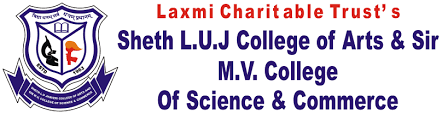

**RAM KUMAR SINGH T118**

**PRACTICAL NO.10**


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df = pd.read_csv("sample_sales_data.csv", encoding="latin1")

print("Head of Dataset:")
print(df.head())
print("\nShape:", df.shape)


Head of Dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abb

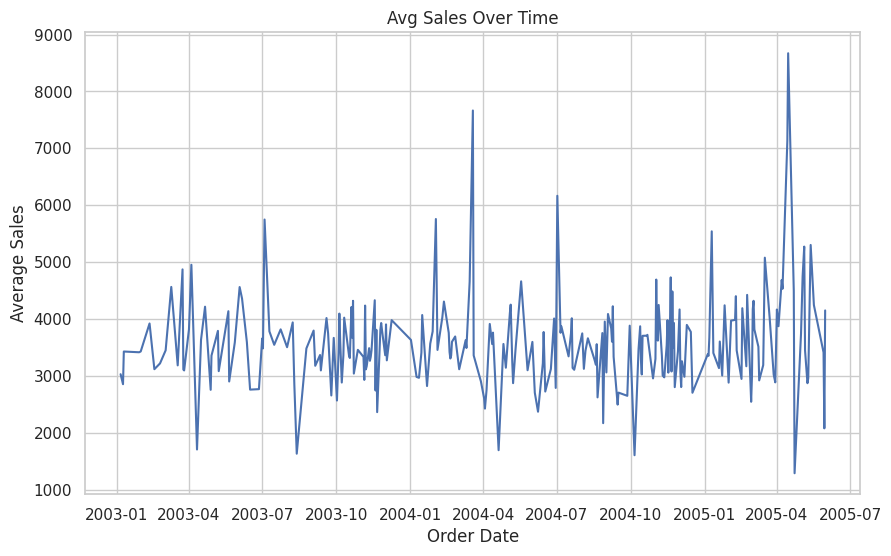

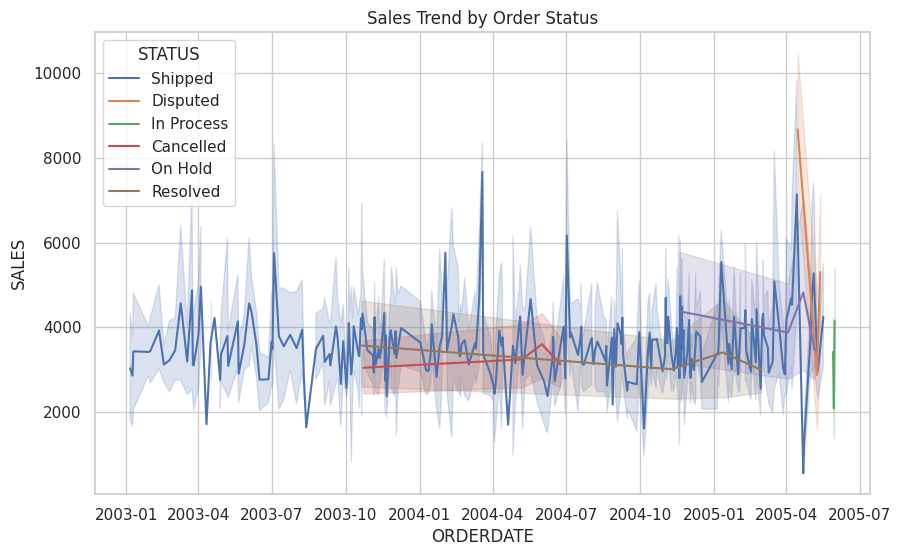

In [4]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

plt.figure(figsize=(10,6))
sns.lineplot(data=df.groupby('ORDERDATE')['SALES'].mean())
plt.title("Avg Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Average Sales")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="ORDERDATE", y="SALES", hue="STATUS")
plt.title("Sales Trend by Order Status")
plt.show()


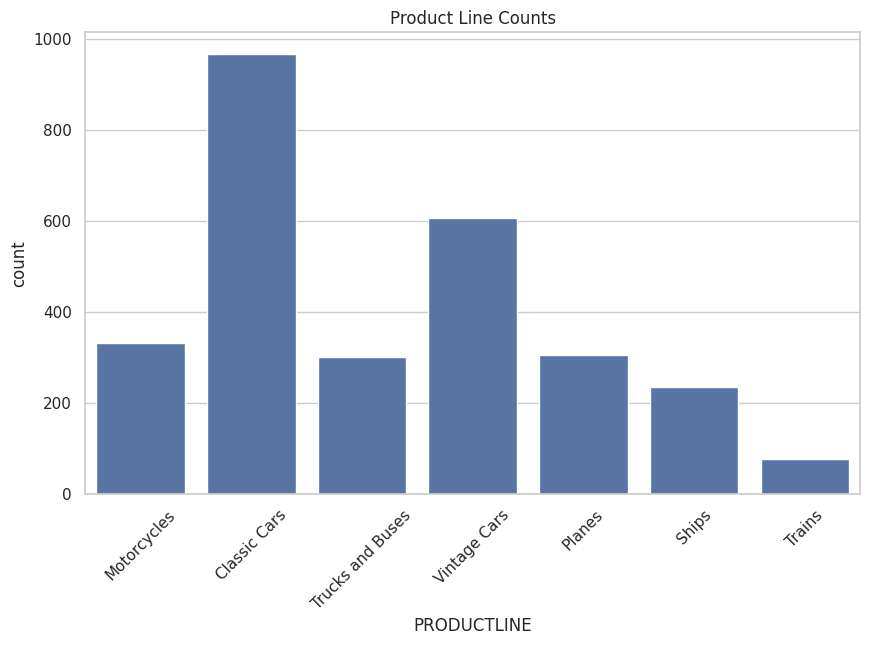

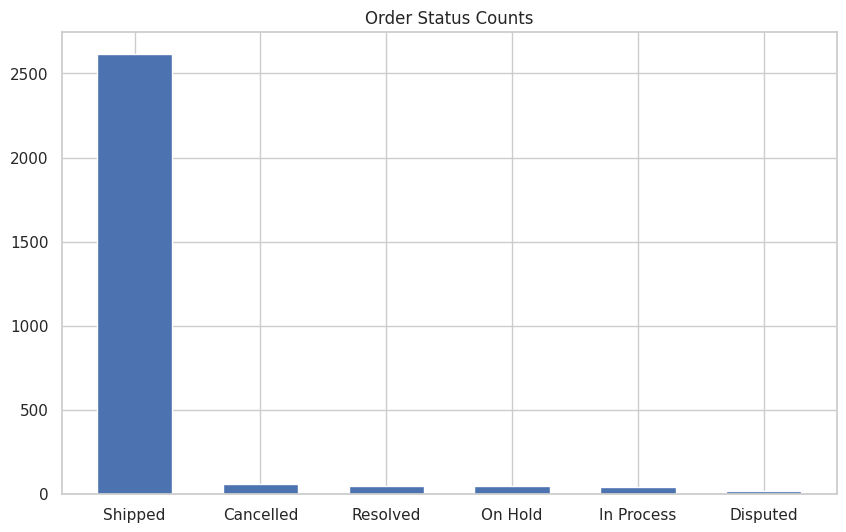

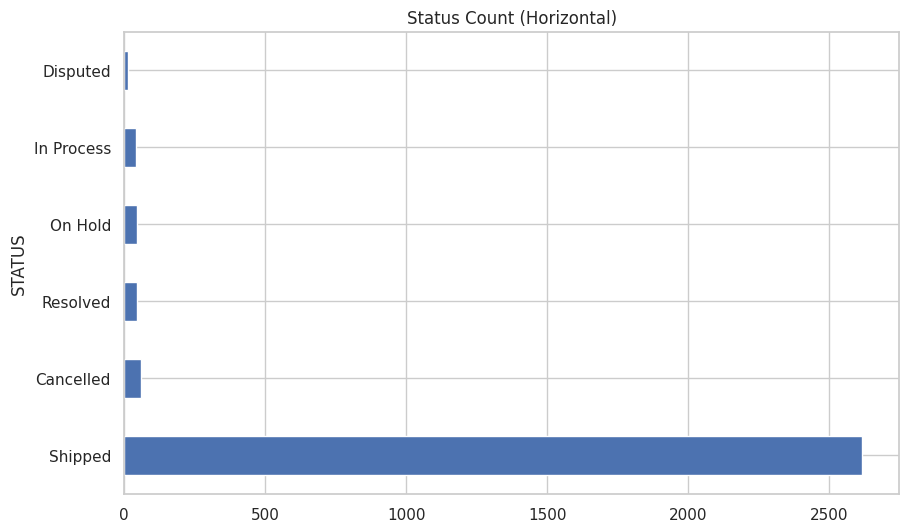

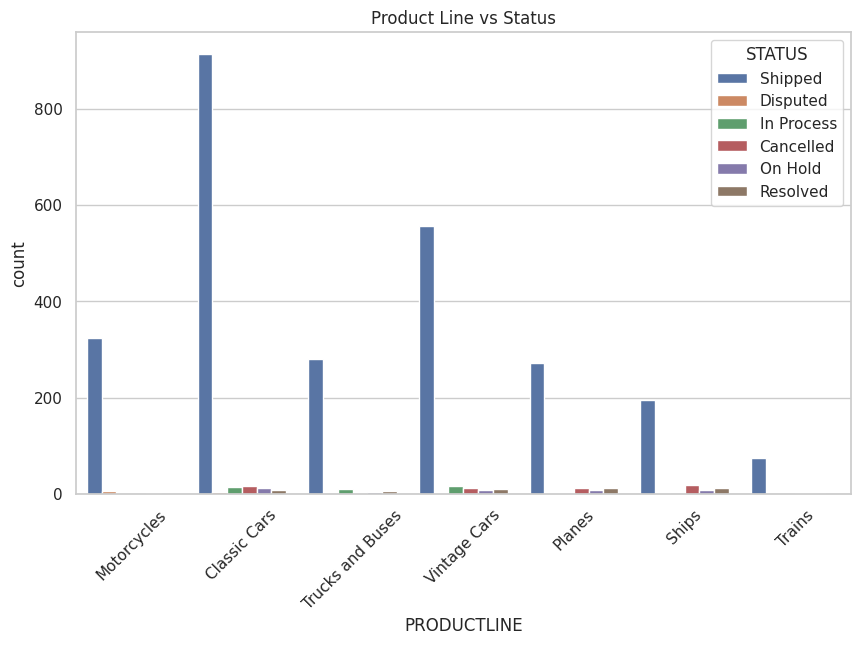

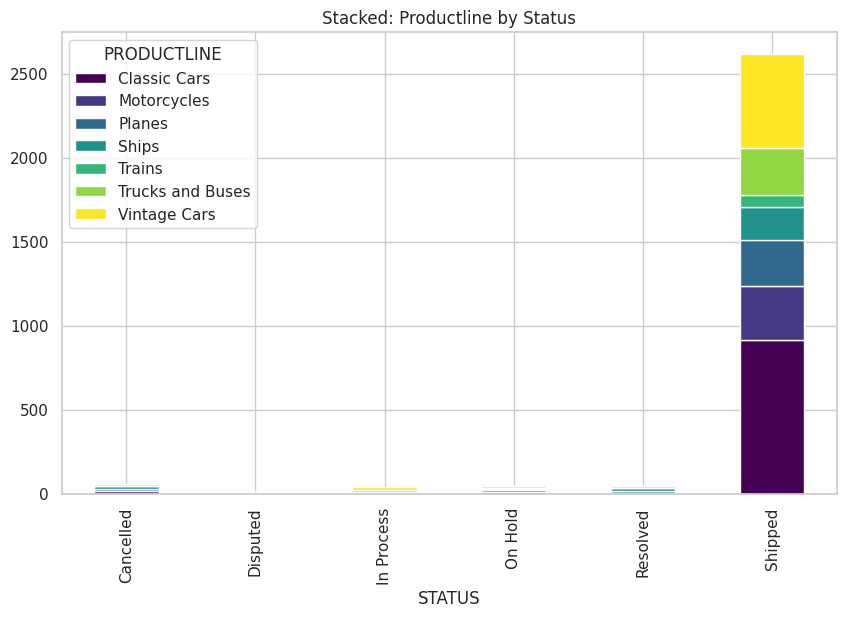

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="PRODUCTLINE")
plt.title("Product Line Counts")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
status_counts = df['STATUS'].value_counts()
plt.bar(status_counts.index, status_counts.values, width=0.6)
plt.title("Order Status Counts")
plt.show()

plt.figure(figsize=(10,6))
df['STATUS'].value_counts().plot.barh()
plt.title("Status Count (Horizontal)")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df, x="PRODUCTLINE", hue="STATUS")
plt.title("Product Line vs Status")
plt.xticks(rotation=45)
plt.show()

group = df.groupby(['STATUS','PRODUCTLINE']).size().unstack(fill_value=0)
group.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title("Stacked: Productline by Status")
plt.show()


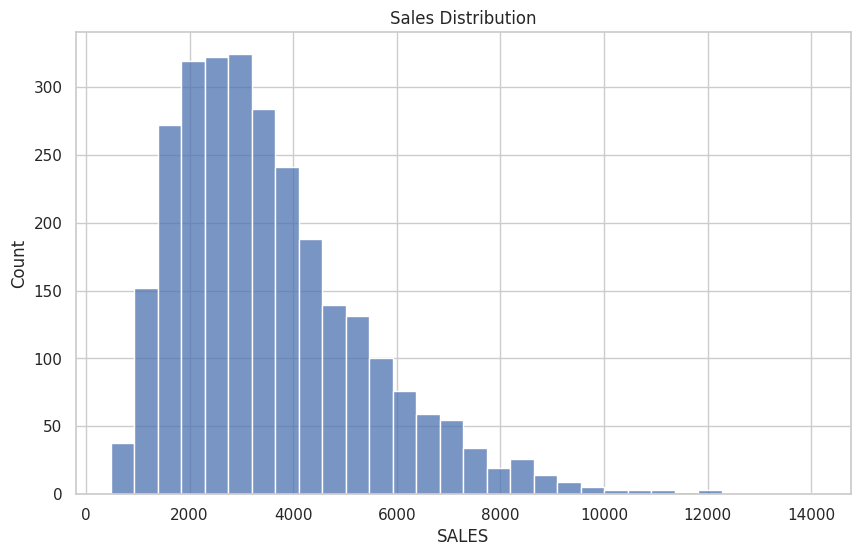

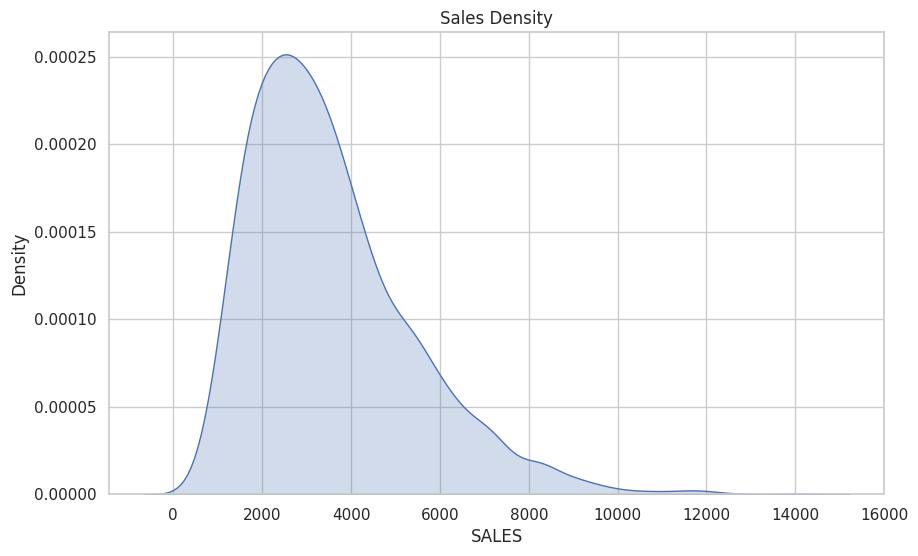

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['SALES'], bins=30)
plt.title("Sales Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(df['SALES'], fill=True)
plt.title("Sales Density")
plt.show()


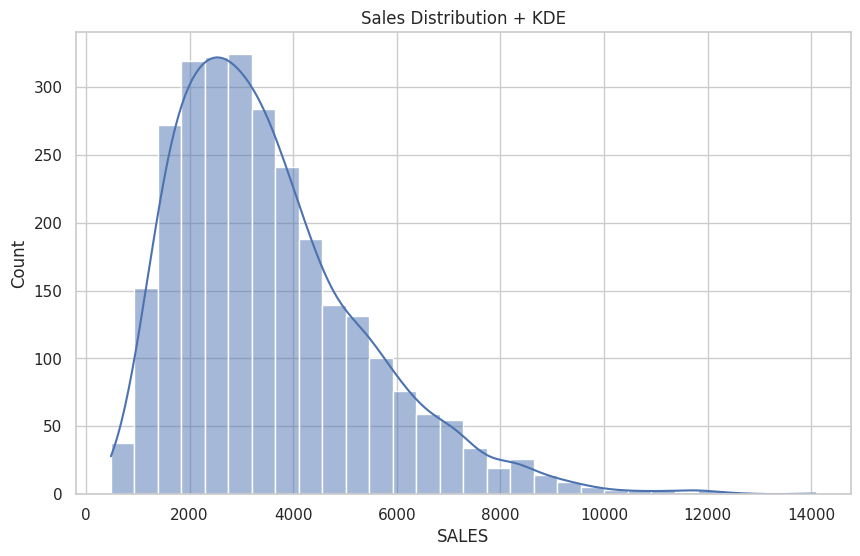

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['SALES'], kde=True, bins=30)
plt.title("Sales Distribution + KDE")
plt.show()


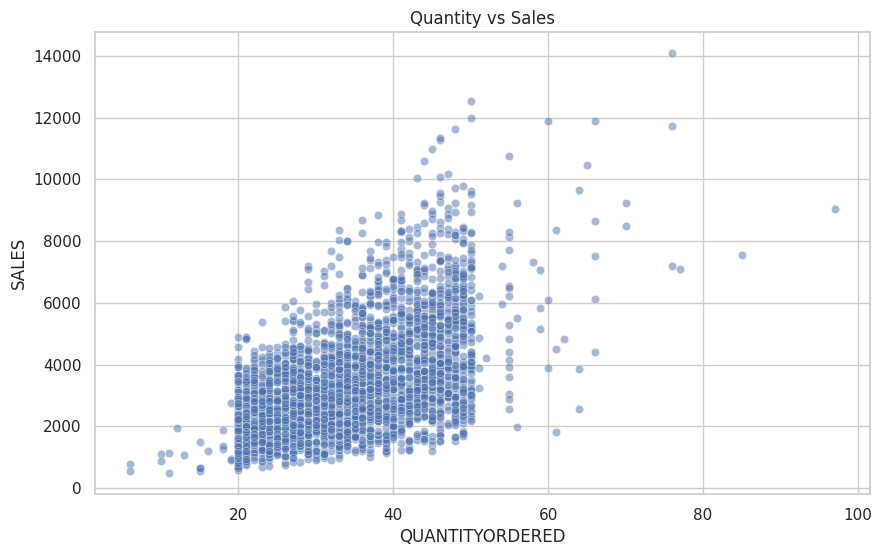

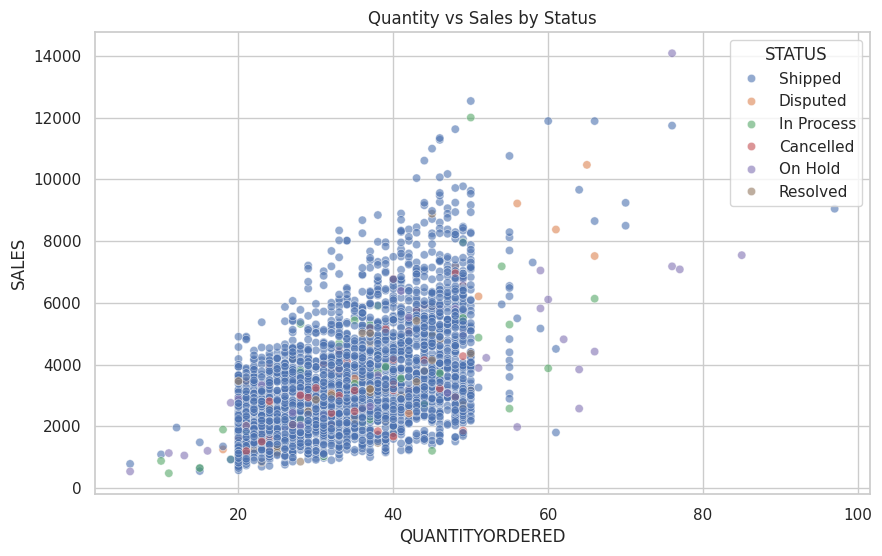

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="QUANTITYORDERED", y="SALES", alpha=0.5)
plt.title("Quantity vs Sales")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="QUANTITYORDERED", y="SALES",
                hue="STATUS", alpha=0.6)
plt.title("Quantity vs Sales by Status")
plt.show()


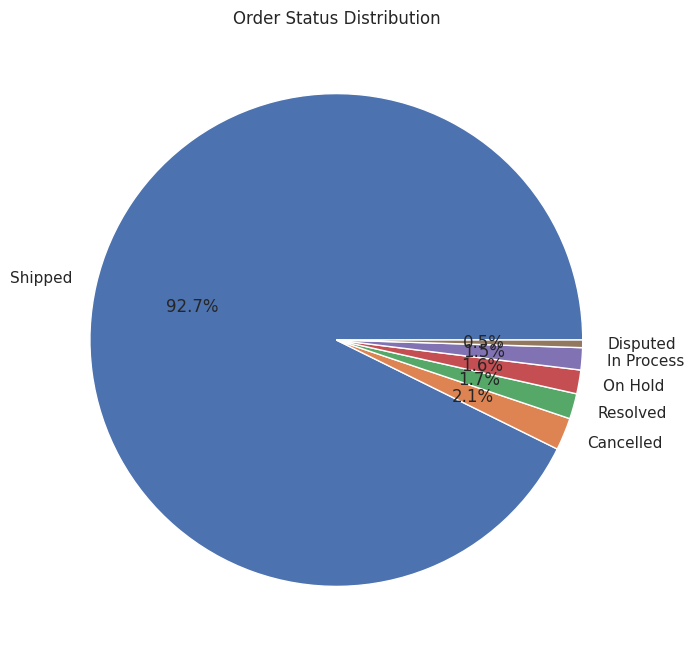

In [9]:
plt.figure(figsize=(8,8))
df['STATUS'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Order Status Distribution")
plt.ylabel("")
plt.show()


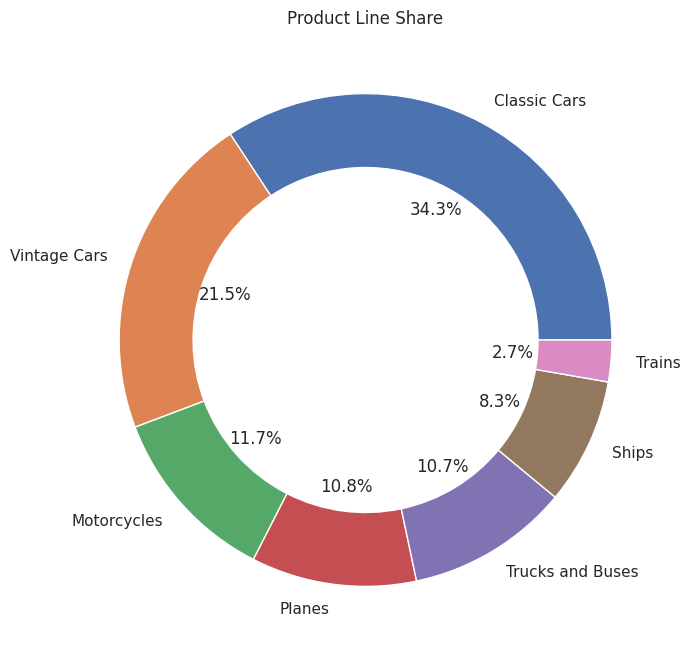

In [10]:
plt.figure(figsize=(8,8))
data = df['PRODUCTLINE'].value_counts()
plt.pie(data, labels=data.index, autopct='%1.1f%%',
        wedgeprops=dict(width=0.3))
plt.title("Product Line Share")
plt.show()


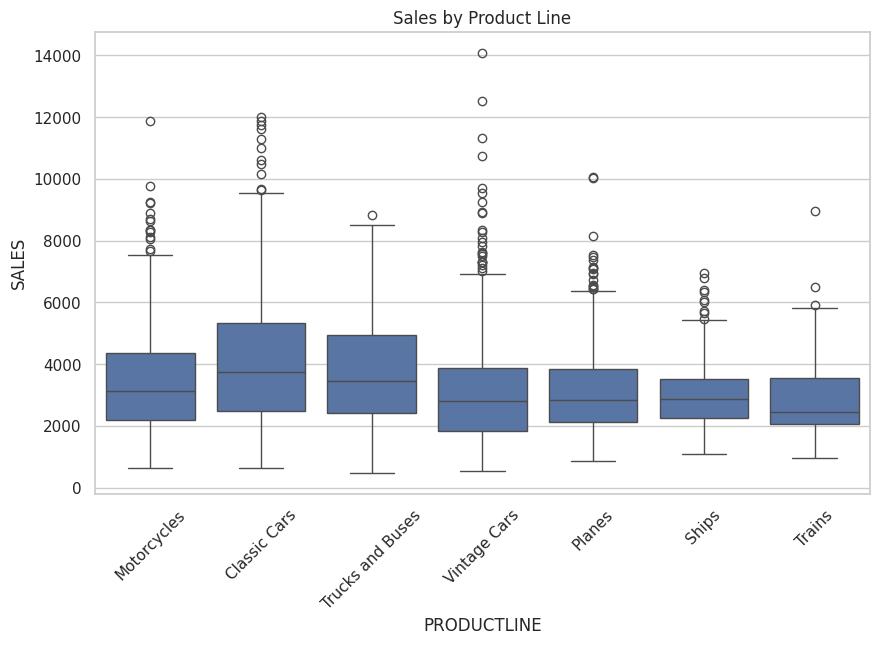

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="PRODUCTLINE", y="SALES")
plt.title("Sales by Product Line")
plt.xticks(rotation=45)
plt.show()


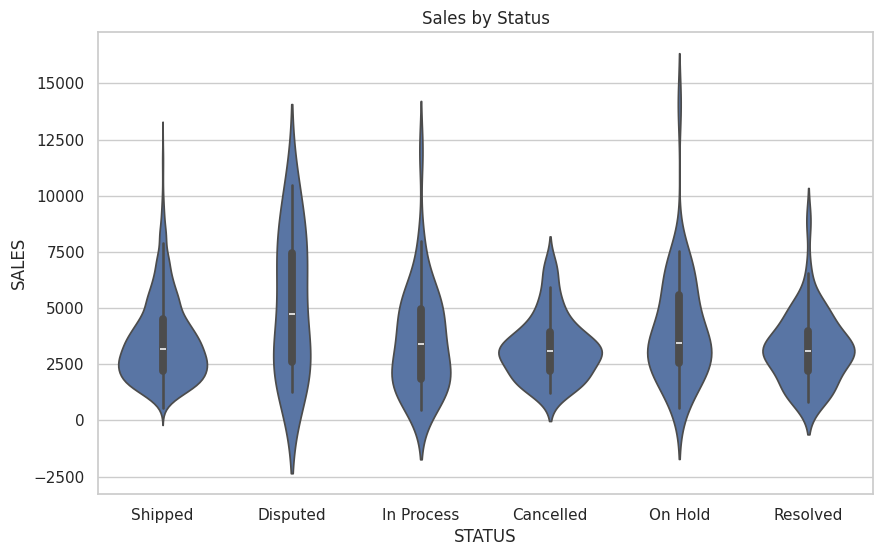

In [12]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="STATUS", y="SALES")
plt.title("Sales by Status")
plt.show()


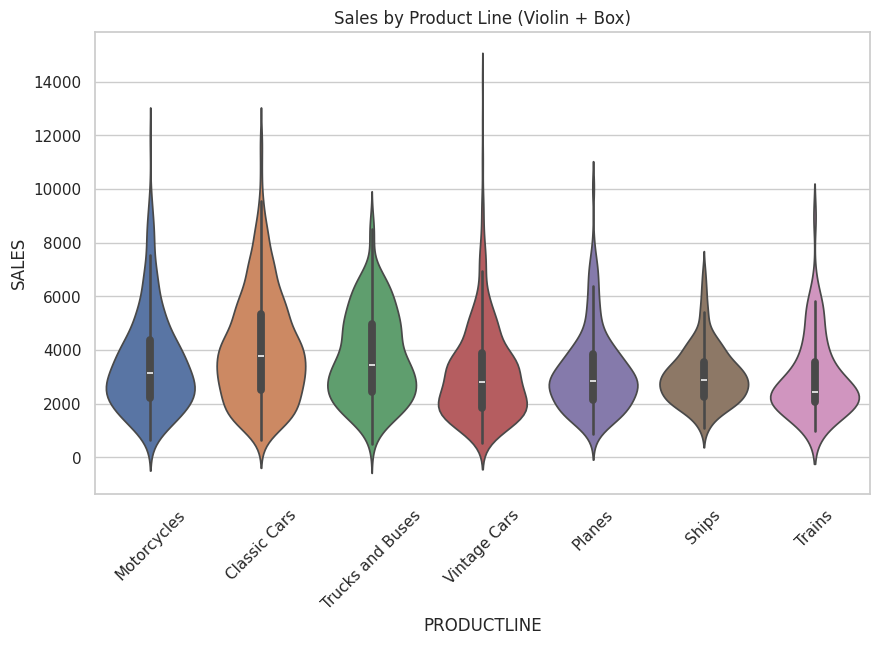

In [13]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="PRODUCTLINE", y="SALES",
               inner="box", hue="PRODUCTLINE", legend=False)
plt.title("Sales by Product Line (Violin + Box)")
plt.xticks(rotation=45)
plt.show()


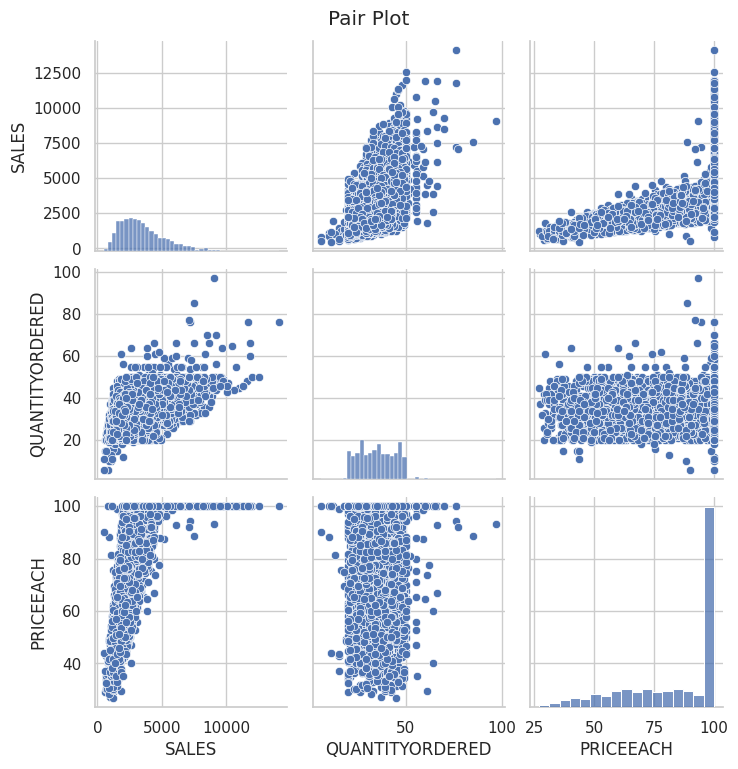

In [14]:
pair_cols = ['SALES','QUANTITYORDERED','PRICEEACH']
sns.pairplot(df[pair_cols])
plt.suptitle("Pair Plot", y=1.02)
plt.show()


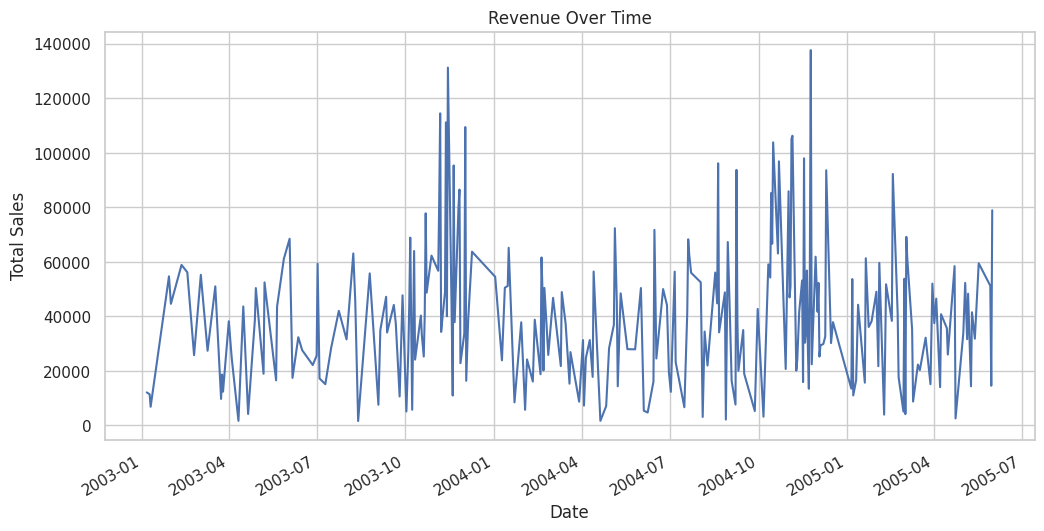

In [15]:
ts = df.groupby('ORDERDATE')['SALES'].sum()
plt.figure(figsize=(12,6))
ts.plot()
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()
